# **Submission 02 - Bike Sharing Dataset - Time Series**
### **Nur Imam Masri**
### **nurimammasri.01@gmail.com**

# **Import Library**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
plt.style.use('seaborn')

# **Data Loading**

**Bike Sharing Dataset Data Set**

[BBC News Archive](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)

**Data Set Information:**

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


**Attribute Information:**

Both `hour.csv` and `day.csv` have the following fields, except hr which is not available in day.csv

- `instant`: record index
- `dteday` : date
- `season` : season (1:winter, 2:spring, 3:summer, 4:fall)
- `yr` : year (0: 2011, 1:2012)
- `mnth` : month ( 1 to 12)
- `hr` : hour (0 to 23)
- `holiday` : weather day is holiday or not (extracted from [Web Link])
- `weekday` : day of the week
- `workingday` : if day is neither weekend nor holiday is 1, otherwise is 0.
+ `weathersit` :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- `temp` : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- `atemp`: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- `hum`: Normalized humidity. The values are divided to 100 (max)
- `windspeed`: Normalized wind speed. The values are divided to 67 (max)
- `casual`: count of casual users
- `registered`: count of registered users
- `cnt`: count of total rental bikes including both casual and registered






Data yang digunakan berasal dari Dataset dari kaggle yang memiliki dataset:

* hours.csv

**use kaggle API**

**Download dataset from Kaggle**

In [3]:
# # install kaggle package
# !pip install -q kaggle

In [4]:
# # upload kaggle.json
# from google.colab import files
# files.upload()

In [5]:
# # make directory and change permission
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !ls ~/.kaggle

In [6]:
# # test kaggle dataset list
# !kaggle datasets list

In [7]:
# # download dataset, choose 'copy api command' from kaggle dataset
# !kaggle datasets download -d marklvl/bike-sharing-dataset

In [8]:
# # unzip
# !mkdir bikesharingdataset
# !unzip bike-sharing-dataset.zip -d bikesharingdataset
# !ls bikesharingdataset

In [9]:
# import pandas as pd
# df_hours = pd.read_csv('bikesharingdataset/hour.csv')
# df_hours.head()

**use by link**

In [10]:
import pandas as pd
df_hours = pd.read_csv('https://drive.google.com/uc?id=1_Z8wZ8LBgFGVSCe9L55cA_uwSiXZzElU', parse_dates=['dteday'], index_col="dteday")
df_hours.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [11]:
df_hours.min()

instant       1.00
season        1.00
yr            0.00
mnth          1.00
hr            0.00
holiday       0.00
weekday       0.00
workingday    0.00
weathersit    1.00
temp          0.02
atemp         0.00
hum           0.00
windspeed     0.00
casual        0.00
registered    0.00
cnt           1.00
dtype: float64

In [12]:
df_hours.max()

instant       17379.0000
season            4.0000
yr                1.0000
mnth             12.0000
hr               23.0000
holiday           1.0000
weekday           6.0000
workingday        1.0000
weathersit        4.0000
temp              1.0000
atemp             1.0000
hum               1.0000
windspeed         0.8507
casual          367.0000
registered      886.0000
cnt             977.0000
dtype: float64

Menampilkan daftar columns

In [13]:
df_hours.columns

Index(['instant', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Ada 17379 baris data yang berarti ada 17379 hours based on day

17 kolom yang berarti 17 columns (Features)

In [14]:
# the shape of data
print('Total Row:', df_hours.shape[0])
print('Total Columns:', df_hours.shape[1])
df_hours.shape

Total Row: 17379
Total Columns: 16


(17379, 16)

Melihat keseluruhan profile data, dapat dilihat tidak ada data null dari 17379 data, serta sebagian data memiliki nilai berupa numerik selain dteday

In [15]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2011-01-01 to 2012-12-31
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12)
memory usage: 2.3 MB


In [16]:
df_hours.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# **Data Visualization**

* Dapat dilihat pada figure 01:

Bahwa nilai pada 'cnt' aatu jumlah rental (casual dan registered) memiliki nilai persebaran data quartil di antara 4- - 280 serta pada data nya juga memiliki outliers.

* Dapat dilihat pada figure 02:

Plot 2 menunjukkan bahwa bulan Januari memiliki jumlah 'cnt' sepeda paling sedikit

* Dapat dilihat pada figure 03:

1:winter, 2:spring, 3:summer, 4:fall

Plot 3 menunjukkan bahwa saat cuaca mempengaruhi jumlah 'cnt'

* Dapat dilihat pada figure 04:

nor holiday is 1, otherwise is 0

Plot 4 menunjukkan bahwa pada hari libur, porsi sepeda sedikit lebih sedikit dibandingkan dengan hari-hari biasa.


dll

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

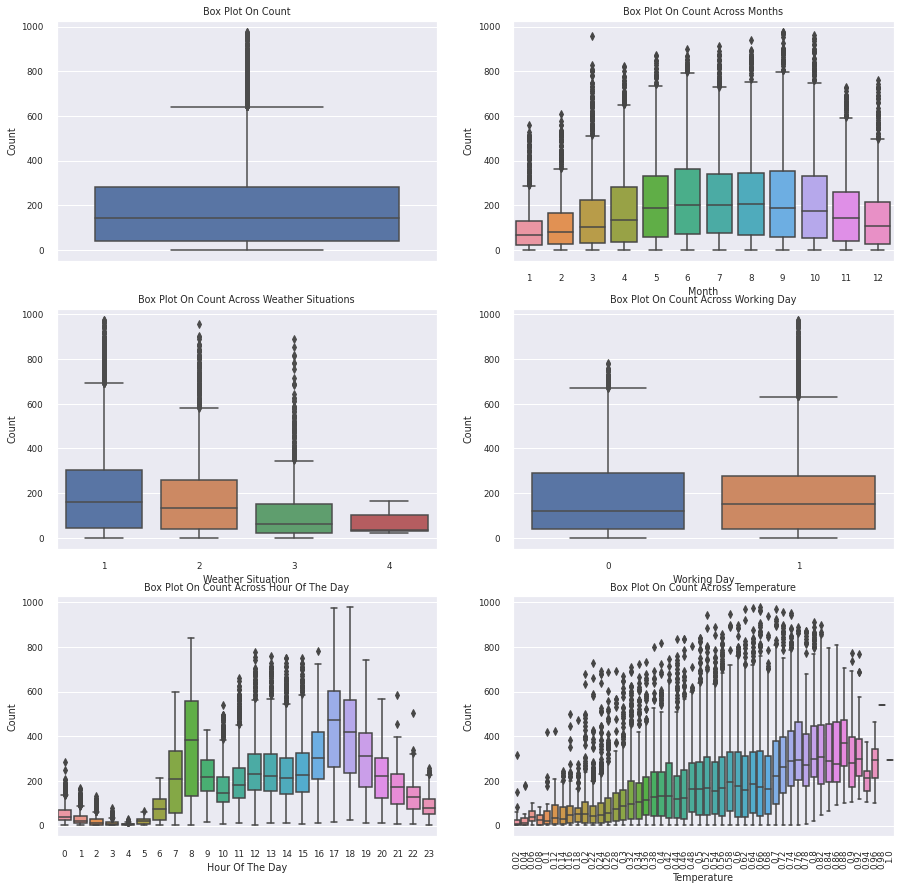

In [17]:
sns.set(font_scale=0.8)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)

# plot 1
sns.boxplot(data=df_hours,y="cnt",orient="v",ax=axes[0][0])
# plot 2
sns.boxplot(data=df_hours,y="cnt",x="mnth",orient="v",ax=axes[0][1])
# plot 3
sns.boxplot(data=df_hours,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
# plot 4
sns.boxplot(data=df_hours,y="cnt",x="workingday",orient="v",ax=axes[1][1])
# plot 5
sns.boxplot(data=df_hours,y="cnt",x="hr",orient="v",ax=axes[2][0])
# plot 6
ax = sns.boxplot(data=df_hours,y="cnt",x="temp",orient="v")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90) # make rotate label 90 der

# set label each of figure plot
axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

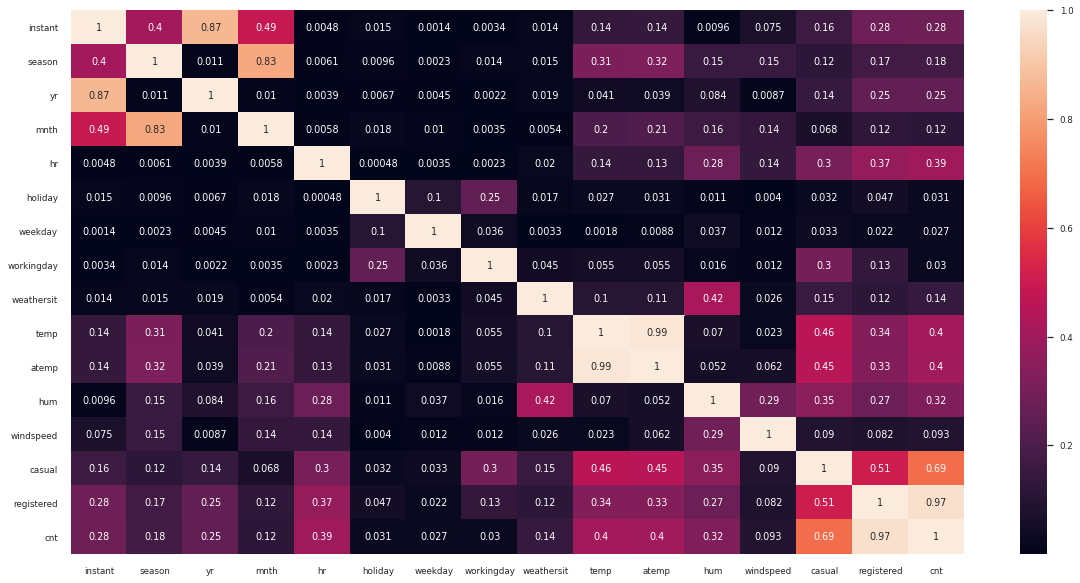

In [18]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_hours.corr().abs(), annot=True)

In [19]:
df_hours.corr().abs().sort_values(by=['cnt'], ascending=False)['cnt']

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
hum           0.322911
instant       0.278379
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64

# **Data Preprocessing**

Dapat dilihat pada data bahwa :
 * 'instant' --> hanya jumlah dari data 
 * 'attemp' --> hanya hasil normalisasi dari kolom 'temp' (since it's redundant)
 * 'weekday', 
 * 'casual', dan 'registered' tidak terlalu berpengaruh pada prediksi --> Dropping "casual" and "registered" , since always casual + registered = count

In [20]:
df_hours.head(3)

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [21]:
df_hours = df_hours.drop(columns=['instant','atemp','weekday','casual','registered'])

In [22]:
df_hours.head(2)

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,0,0,1,0.24,0.81,0.0,16
2011-01-01,1,0,1,1,0,0,1,0.22,0.80,0.0,40


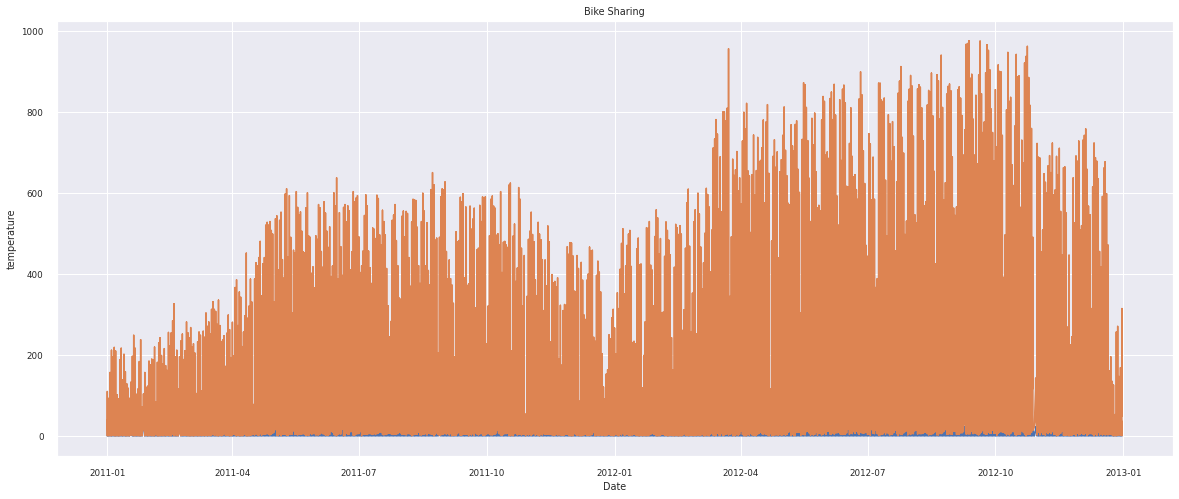

In [23]:
bike=df_hours[['hr','cnt']].copy()
plt.figure(figsize=(20,8))
plt.plot(bike)
plt.title('Bike Sharing')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

**Handling Missing Value**

Untuk mengefektifkan model dalam mempelajari data dilakukan cleaning data dari missing value. Namun dari pengecekan data tidak memiliki missing value.

In [24]:
df_hours.isnull().any()

season        False
yr            False
mnth          False
hr            False
holiday       False
workingday    False
weathersit    False
temp          False
hum           False
windspeed     False
cnt           False
dtype: bool

**Outlier Analysis**

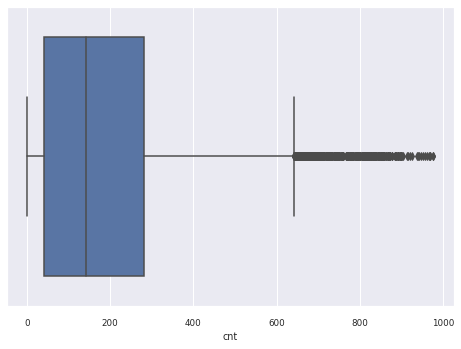

In [25]:
sns.boxplot(x=df_hours['cnt'])

In [26]:
Q1 = df_hours.quantile(0.25)
Q3 = df_hours.quantile(0.75)
print(Q1)
print(Q3)

season         2.0000
yr             0.0000
mnth           4.0000
hr             6.0000
holiday        0.0000
workingday     0.0000
weathersit     1.0000
temp           0.3400
hum            0.4800
windspeed      0.1045
cnt           40.0000
Name: 0.25, dtype: float64
season          3.0000
yr              1.0000
mnth           10.0000
hr             18.0000
holiday         0.0000
workingday      1.0000
weathersit      2.0000
temp            0.6600
hum             0.7800
windspeed       0.2537
cnt           281.0000
Name: 0.75, dtype: float64


In [27]:
IQR = Q3 - Q1
print(IQR)

season          1.0000
yr              1.0000
mnth            6.0000
hr             12.0000
holiday         0.0000
workingday      1.0000
weathersit      1.0000
temp            0.3200
hum             0.3000
windspeed       0.1492
cnt           241.0000
dtype: float64


In [28]:
outlier = (df_hours < (Q1-1.5*IQR)) | (df_hours > (Q3+1.5*IQR))
pd.set_option('display.max_rows', outlier.shape[0]+1)
outlier

Output hidden; open in https://colab.research.google.com to view.

In [29]:
df_hours_out = df_hours[~((df_hours < (Q1-1.5*IQR))|(df_hours>(Q3+1.5*IQR))).any(axis=1)]
df_hours_out.shape

(16029, 11)

**Scaling / Normalization**

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
sc = StandardScaler()

In [32]:
columns_to_scale = ['temp','hum','windspeed']
df_hours[columns_to_scale] = sc.fit_transform(df_hours[columns_to_scale])
df_hours['cnt'] = sc.fit_transform(df_hours[['cnt']])
df_hours.head()

,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,cnt
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,0,0,1,-1.334648,0.947372,-1.553889,-0.956339
2011-01-01,1,0,1,1,0,0,1,-1.438516,0.895539,-1.553889,-0.824022
2011-01-01,1,0,1,2,0,0,1,-1.438516,0.895539,-1.553889,-0.868128
2011-01-01,1,0,1,3,0,0,1,-1.334648,0.636370,-1.553889,-0.972879
2011-01-01,1,0,1,4,0,0,1,-1.334648,0.636370,-1.553889,-1.039037


**Split Data**

Selanjutnya dilakukan ektraksi data.

Maka kita tinggal mengektraksi label dan featuresnya

Prepare Feature and Label

* `feature` data set biasa disebut independent data set (X), yakni columns

* `target` data set also known as the dependent data set (Y)

Kemudian selanjutnya akan di split antara data training dan data testing

In [33]:
features = df_hours.drop(columns=['cnt'])
temp = df_hours['cnt']

**Create Data Sequence**

In [34]:
def create_data_sequence(X, y, time_steps=1):
    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)        
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

In [35]:
time_steps = 7

features_sequence, temp_sequence = create_data_sequence(features, temp, time_steps)

print("Training data shape", features_sequence.shape, "Training data output shape", temp_sequence.shape)

Training data shape (17372, 7, 10) Training data output shape (17372,)


Lalu, bagi data untuk training dan data untuk testing, dengan presentasi 80% Training set dan 20% Validation set.

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_sequence, temp_sequence, test_size=0.2, random_state=42, shuffle = True)

In [37]:
print(len(x_train), len(x_test))

13897 3475


In [38]:
x_train.shape

(13897, 7, 10)

# **Data Modelling**

In [39]:
import tensorflow as tf
from keras.layers import Dense, LSTM

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=128,input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=["mae"])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               71168     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 71,297
Trainable params: 71,297
Non-trainable params: 0
_________________________________________________________________


Selanjutnya kita buat kelas callback. fungsi yang paling penting yaitu `on_epoch_end()`. Fungsi inilah yang akan kita gunakan untuk memberitahu model agar berhenti melakukan pelatihan ketika telah mencapai target.

Kode `self.model.stop_training = True` adalah kode yang memberi tahu model untuk menghentikan pelatihan.

In [41]:
max = df_hours['cnt'].max()
print('Max value : ' )
print(max)

Max value : 
4.341860055499453


In [42]:
min = df_hours['cnt'].min()
print('Min Value : ')
print(min)

Min Value : 
-1.0390374588011282


In [43]:
x = (max - min) * (10 / 100)
print(x)

0.5380897514300581


In [44]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < x):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

Terakhir kita dapat mulai melatih model kita dengan memanggil fungsi fit().

In [45]:
num_epochs = 50
history = model.fit(
    x_train,
    y_train, 
    epochs=num_epochs, 
    batch_size=64, 
    validation_split=0.1,
    shuffle=False,
)

Epoch 1/50
196/196 [==============================] - 5s 17ms/step - loss: 0.6018 - mae: 0.5658 - val_loss: 0.2289 - val_mae: 0.3162
Epoch 2/50
196/196 [==============================] - 2s 13ms/step - loss: 0.2364 - mae: 0.3415 - val_loss: 0.1454 - val_mae: 0.2634
Epoch 3/50
196/196 [==============================] - 2s 13ms/step - loss: 0.1534 - mae: 0.2779 - val_loss: 0.1014 - val_mae: 0.2157
Epoch 4/50
196/196 [==============================] - 2s 13ms/step - loss: 0.1224 - mae: 0.2483 - val_loss: 0.0960 - val_mae: 0.2095
Epoch 5/50
196/196 [==============================] - 2s 12ms/step - loss: 0.1088 - mae: 0.2307 - val_loss: 0.0875 - val_mae: 0.1974
Epoch 6/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0962 - mae: 0.2147 - val_loss: 0.0862 - val_mae: 0.2008
Epoch 7/50
196/196 [==============================] - 2s 12ms/step - loss: 0.0978 - mae: 0.2178 - val_loss: 0.0834 - val_mae: 0.1915
Epoch 8/50
196/196 [==============================] - 2s 12ms/step - 

**Plot Loss dan Akurasi**

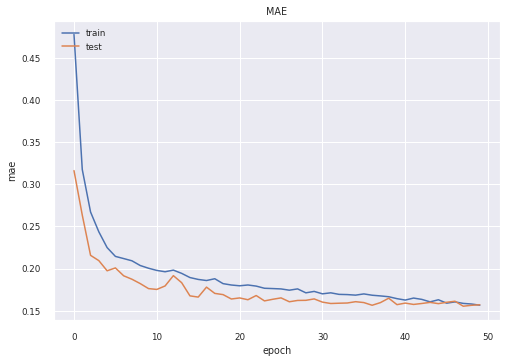

In [46]:
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

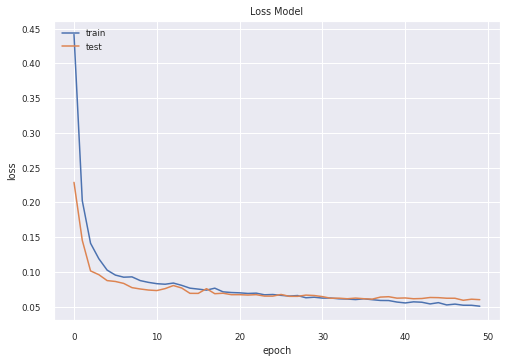

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()